In [1]:
pip install catboost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from catboost import CatBoostClassifier
from scipy.stats import norm

In [3]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [6]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [7]:
data.isna().sum().sum()

0

In [8]:
# y includes our labels and x includes our features
y = data.Potability
list_ = ['Potability']
X = data.drop(list_, axis = 1 )
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [9]:
y.sum()

1278

In [10]:
# Нормализация данных для Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))

Random Forest:
Accuracy: 0.6407 ± 0.0324


In [12]:
# 2. Logistic Regression с нормализованными данными
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores = cross_val_score(logreg_model, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores.mean(), logreg_cv_scores.std()))


Logistic Regression (with normalization):
Accuracy: 0.6102 ± 0.0006


In [13]:
# 3. CatBoost с улучшенными параметрами
catboost_model = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)

catboost_cv_scores = cross_val_score(catboost_model, X, y, cv=5, scoring='accuracy')
print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores.mean(), catboost_cv_scores.std()))

CatBoost:
Accuracy: 0.6169 ± 0.0227


In [ ]:
# Gauss classic

In [15]:
def Gaus_neuron_hard(df, n, S_):

    brdrs_ar = np.zeros((df.shape[1], n))

    for indx, col in enumerate(df.columns):

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)

        s_tst = ((max_ - min_) * (1 /(n-1)) + min_) - ((max_ - min_) * (0 /(n-1)) + min_)

        for i in range(n):
            loc = (max_ - min_) * (i /(n-1)) + min_
            brdrs_ar[indx, i] = loc

        hard_enc_G = (vol.reshape(-1, 1) - np.tile(brdrs_ar[indx, :], (X.shape[0], 1))) ** 2 / (S_ ** 2)

        if indx == 0:
            hard_G_Total = hard_enc_G.copy()
        else:
            hard_G_Total = np.hstack((hard_G_Total, hard_enc_G))

    return hard_G_Total, brdrs_ar

In [16]:
Final_df_HARD = Gaus_neuron_hard(X, 30, 0.6)[0]
Final_df_HARD = np.exp(-Final_df_HARD)
Final_df_HARD = np.where(Final_df_HARD < 0.01, 0, Final_df_HARD)
Final_df_HARD *= 10
Final_df_HARD = np.round(Final_df_HARD)
Final_df_HARD = pd.DataFrame(Final_df_HARD)
Final_df_HARD

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,9.0,3.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,7.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


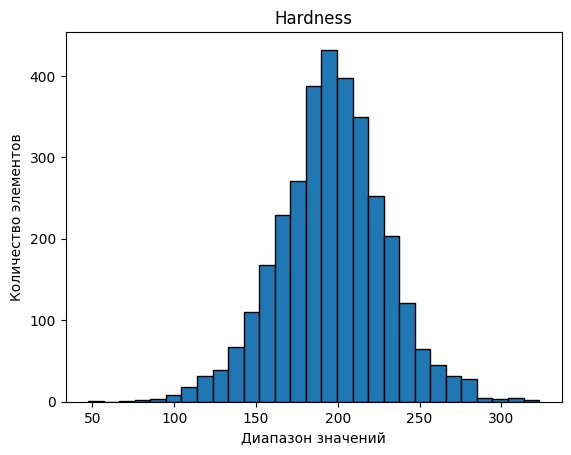

In [40]:
k = 1

# Подсчёт элементов в каждом бакете
hist, bin_edges = np.histogram(X.iloc[:,k].values, bins = Gaus_neuron_hard(X, 30, 0.6)[1][k])

# Построение гистограммы
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Настройка осей
plt.xlabel('Диапазон значений')
plt.ylabel('Количество элементов')
plt.title(f'{X.columns[k]}')

# Показать график
plt.show()

In [17]:
# Нормализация данных для Logistic Regression
scaler_G_HARD = StandardScaler()
X_train_scaled_G_HARD = scaler_G_HARD.fit_transform(Final_df_HARD)

In [19]:
Final_df_HARD.shape

(3276, 270)

In [20]:
# 1. Random Forest
rf_model_G_HARD = RandomForestClassifier(random_state=42)
rf_cv_scores_G_HARD = cross_val_score(rf_model_G_HARD, Final_df_HARD, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores_G_HARD.mean(), rf_cv_scores_G_HARD.std()))

Random Forest:
Accuracy: 0.5855 ± 0.0102


In [21]:
# 2. Logistic Regression с нормализованными данными
logreg_model_G_HARD = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores_G_HARD = cross_val_score(logreg_model_G_HARD, scaler_G_HARD.fit_transform(Final_df_HARD), y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores_G_HARD.mean(), logreg_cv_scores_G_HARD.std()))

Logistic Regression (with normalization):
Accuracy: 0.5696 ± 0.0091


In [22]:
# 3. CatBoost с улучшенными параметрами
catboost_model_G_HARD = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)
catboost_cv_scores_G_HARD = cross_val_score(catboost_model_G_HARD, Final_df_HARD, y, cv=5, scoring='accuracy')

print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores_G_HARD.mean(), catboost_cv_scores_G_HARD.std()))

CatBoost:
Accuracy: 0.5586 ± 0.0075


In [32]:
# ADVANCE GAUSS ENCODING

def calculate_quantile_bounds(data, num_quantiles):

    data = np.asarray(data)
    quantile_bounds = np.quantile(data, q = np.linspace(0, 1, num_quantiles))# + 1

    return quantile_bounds

In [33]:
def hard_transform(ci_ar, x_ar):

    N_ci = ci_ar.shape[0]
    test_init = np.digitize(x_ar, ci_ar, right = True).reshape(-1, 1)
    test = test_init.copy()

    pi_ar = np.ones((x_ar.shape[0], ci_ar.shape[0]))

    ind_min_x = np.unique(np.where(test_init == 0)[0])
    ind_max_x = np.unique(np.where(test_init == ci_ar.shape[0])[0])
    pi_ar[ind_min_x] = np.arange(ci_ar.shape[0])
    pi_ar[ind_max_x] = np.flip(np.arange(ci_ar.shape[0]))

    ind_oth = np.setdiff1d(np.arange(len(x_ar)), np.hstack((ind_min_x, ind_max_x)))

    right_b = ci_ar[test_init[ind_oth].flatten()]
    left_b = ci_ar[test_init[ind_oth].flatten() - 1]

    left_d = (x_ar[ind_oth] - left_b) / (right_b - left_b )
    right_d = (- x_ar[ind_oth] + right_b) / (right_b - left_b )

    pi_ar[ind_oth, test_init[ind_oth].flatten()] = right_d
    pi_ar[ind_oth, test_init[ind_oth].flatten() - 1] = left_d

    mask = pi_ar[ind_oth] != 1
    left_non_one = np.argmax(mask, axis=1)
    right_non_one = pi_ar[ind_oth].shape[1] - 1 - np.argmax(mask[:, ::-1], axis=1)

    for i, _idx in enumerate(ind_oth):
        csum_ = np.cumsum(pi_ar[_idx, right_non_one[i]:])
        pi_ar[_idx, right_non_one[i]:] = csum_

    for i, _idx in enumerate(ind_oth):
        csum_ = np.cumsum(pi_ar[_idx, :left_non_one[i]+1][::-1])[::-1]
        pi_ar[_idx, : left_non_one[i] + 1] = csum_

    return pi_ar

In [34]:
def Gaus_neuron_hard_AD(df, n, S_):

    brdrs_ar = np.zeros((df.shape[1], n))

    for indx, col in enumerate(df.columns):

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)

        quantile_bounds = calculate_quantile_bounds(vol, n)
        brdrs_ar[indx, :] = quantile_bounds

        hard_enc_G = (hard_transform(quantile_bounds, vol)) ** 2 / (S_ ** 2)

        if indx == 0:
            hard_G_Total = hard_enc_G.copy()
        else:
            hard_G_Total = np.hstack((hard_G_Total, hard_enc_G))

    return hard_G_Total, brdrs_ar

In [35]:
Final_df_HARD_AD = Gaus_neuron_hard_AD(X, 30, 0.6)[0]
Final_df_HARD_AD = np.exp(-Final_df_HARD_AD)
Final_df_HARD_AD = np.where(Final_df_HARD_AD < 0.01, 0, Final_df_HARD_AD)
Final_df_HARD_AD *= 10
Final_df_HARD_AD = np.round(Final_df_HARD_AD)
Final_df_HARD_AD = pd.DataFrame(Final_df_HARD_AD)
Final_df_HARD_AD

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0


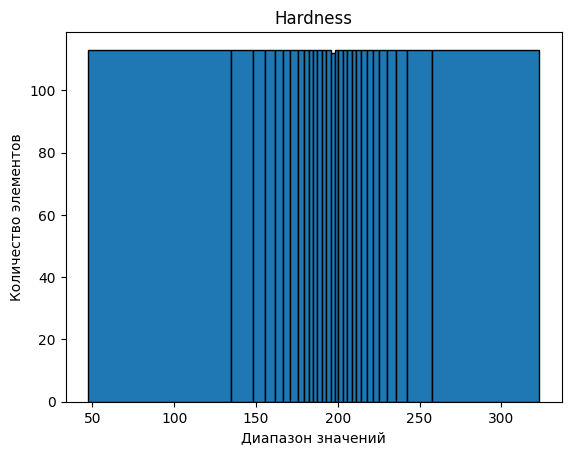

In [39]:
k = 1

# Подсчёт элементов в каждом бакете
hist, bin_edges = np.histogram(X.iloc[:,k].values, bins = Gaus_neuron_hard_AD(X, 30, 0.6)[1][k])

# Построение гистограммы
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')

# Настройка осей
plt.xlabel('Диапазон значений')
plt.ylabel('Количество элементов')
plt.title(f'{X.columns[k]}')

# Показать график
plt.show()

In [41]:
# Нормализация данных для Logistic Regression
scaler_G_HARD_AD = StandardScaler()
X_train_scaled_G_HARD_AD = scaler_G_HARD_AD.fit_transform(Final_df_HARD_AD)

In [42]:
# 1. Random Forest
rf_model_G_HARD_AD = RandomForestClassifier(random_state=42)
rf_cv_scores_G_HARD_AD = cross_val_score(rf_model_G_HARD_AD, Final_df_HARD_AD, y, cv=5, scoring='accuracy')

print("Random Forest:")
print("Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores_G_HARD_AD.mean(), rf_cv_scores_G_HARD_AD.std()))

Random Forest:
Accuracy: 0.6001 ± 0.0156


In [43]:
# 2. Logistic Regression с нормализованными данными
logreg_model_G_HARD_AD = LogisticRegression(max_iter=10000, random_state=42)
logreg_cv_scores_G_HARD_AD = cross_val_score(logreg_model_G_HARD_AD, scaler.fit_transform(Final_df_HARD_AD), y, cv=5, scoring='accuracy')

print("Logistic Regression (with normalization):")
print("Accuracy: {:.4f} ± {:.4f}".format(logreg_cv_scores_G_HARD_AD.mean(), logreg_cv_scores_G_HARD_AD.std()))

Logistic Regression (with normalization):
Accuracy: 0.5794 ± 0.0171


In [44]:
# 3. CatBoost с улучшенными параметрами
catboost_model_G_HARD_AD = CatBoostClassifier(
    iterations=2000,         # Увеличение количества итераций
    learning_rate=0.05,      # Уменьшение скорости обучения
    depth=8,                 # Увеличение глубины деревьев
    l2_leaf_reg=3,           # Регуляризация L2 для предотвращения переобучения
    bagging_temperature=1.0, # Использование bagging для улучшения обобщающей способности
    verbose=0,               # Отключение вывода
    random_seed=42
)
catboost_cv_scores_G_HARD_AD = cross_val_score(catboost_model_G_HARD_AD, Final_df_HARD_AD, y, cv=5, scoring='accuracy')

print("CatBoost:")
print("Accuracy: {:.4f} ± {:.4f}".format(catboost_cv_scores_G_HARD_AD.mean(), catboost_cv_scores_G_HARD_AD.std()))

CatBoost:
Accuracy: 0.5894 ± 0.0167
